Analiza danych ekonomicznych w celu określenia, czy istnieje związek pomiędzy napływem migrantów a konsumpcją.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hicp = pd.read_csv('../processed_data/HICP_annual_indices_for_all_goods.csv')
unex_expences = pd.read_csv('../processed_data/inability_to_face_unexpected_expenses_(wealth).csv')
income_per_citizenship = pd.read_csv('../processed_data/mean_and_median_income_by_citizenship_ilc_di15.csv')

In [3]:
migration = pd.read_csv('../processed_data/immigration_by_citizenship.csv')

Najwięcej imigrantów przyjmują -> wniosek z pliku ../data_analysis/migration_patterns.ipynb
* NIEMCY
* HISZPANIA
* WIELKA BRYTANIA
* WŁOCHY
* HOLANDIA
* FRANCJA
+kraje wybrane do analizy 

In [4]:
countries = [
    "Germany", "Spain", "United Kingdom", 
    "Italy", "Netherlands", "France",
    "Poland", "Bulgaria", "Romania",
    "Hungary", "Sweden"
]

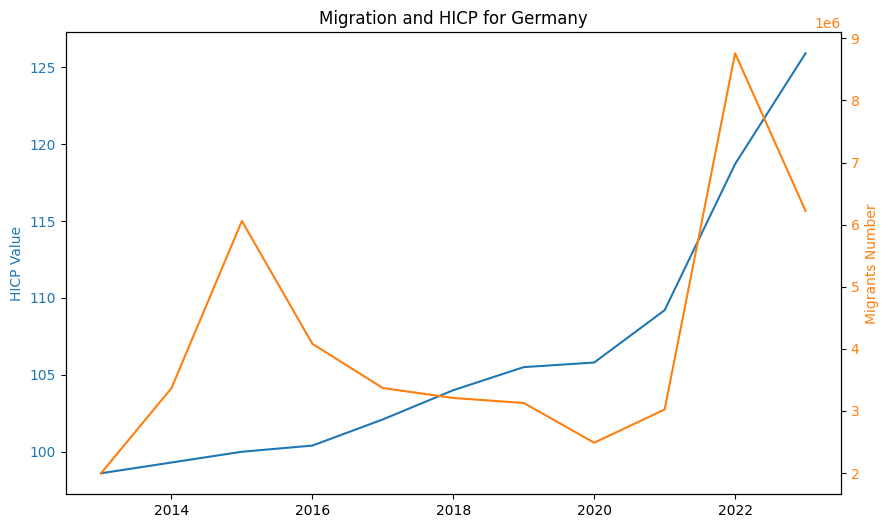

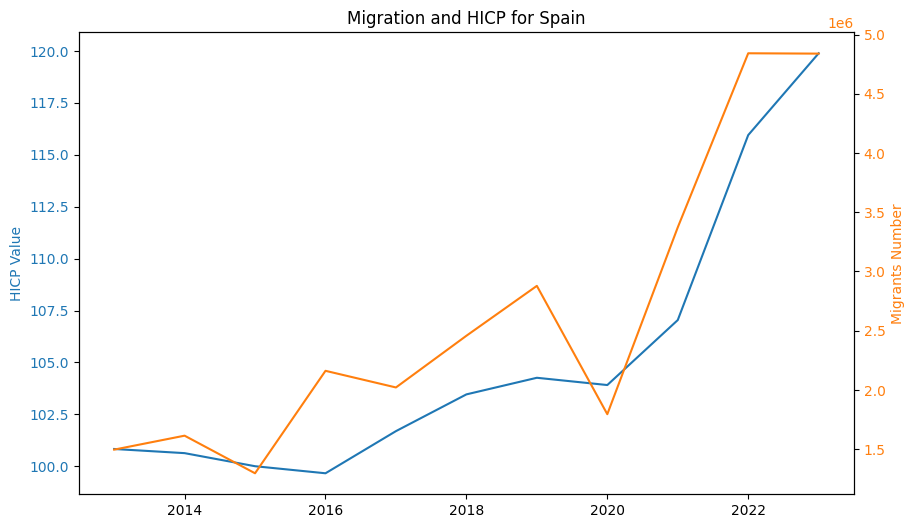

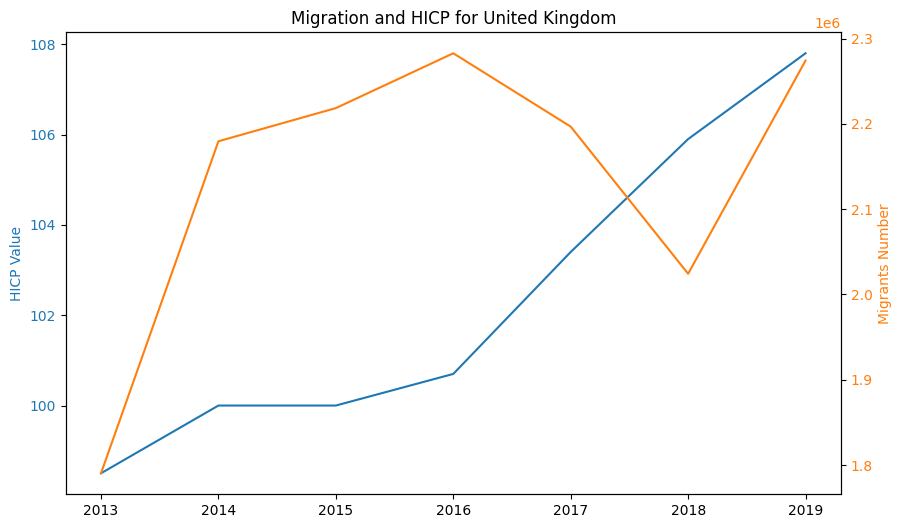

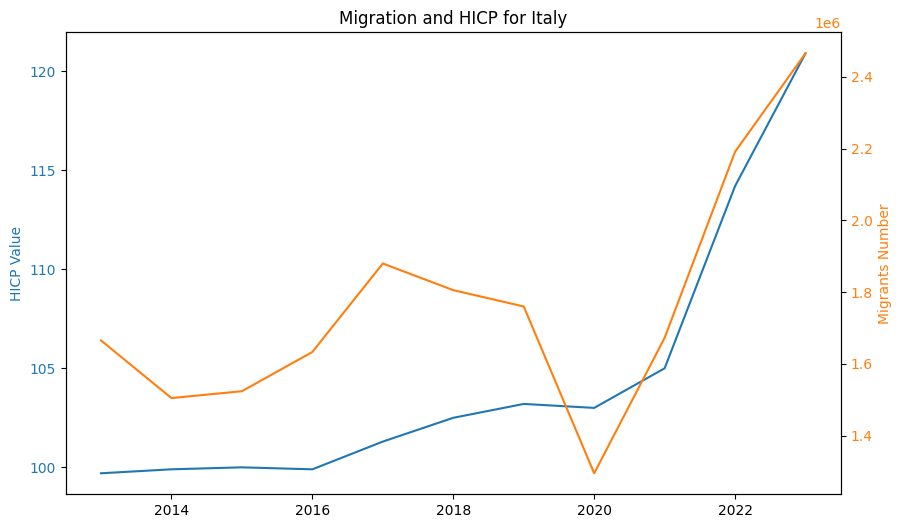

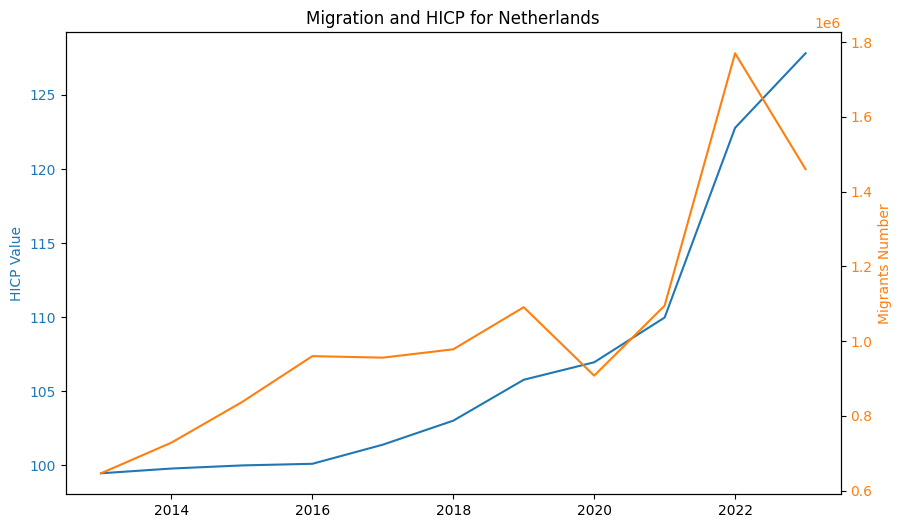

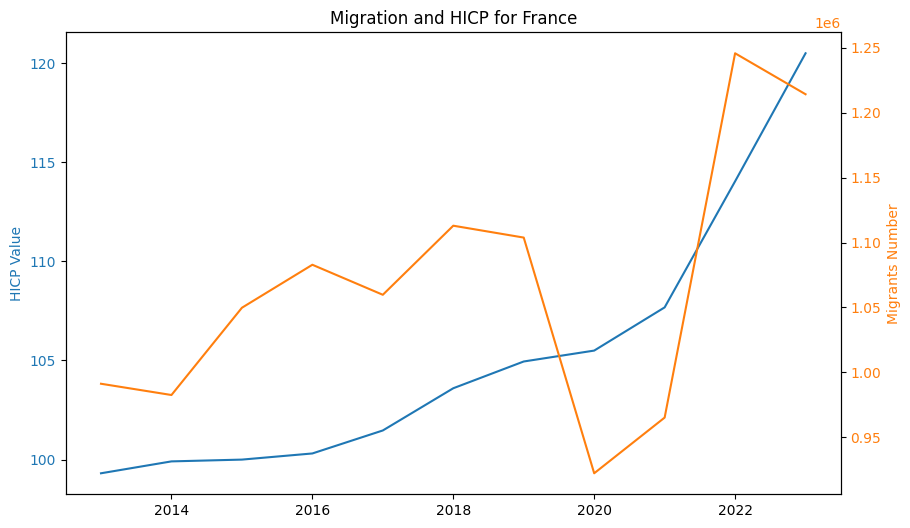

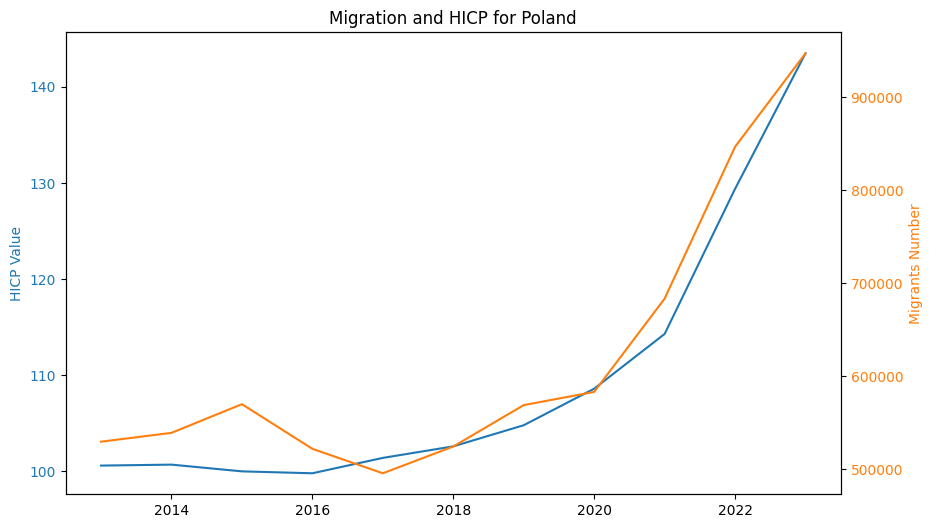

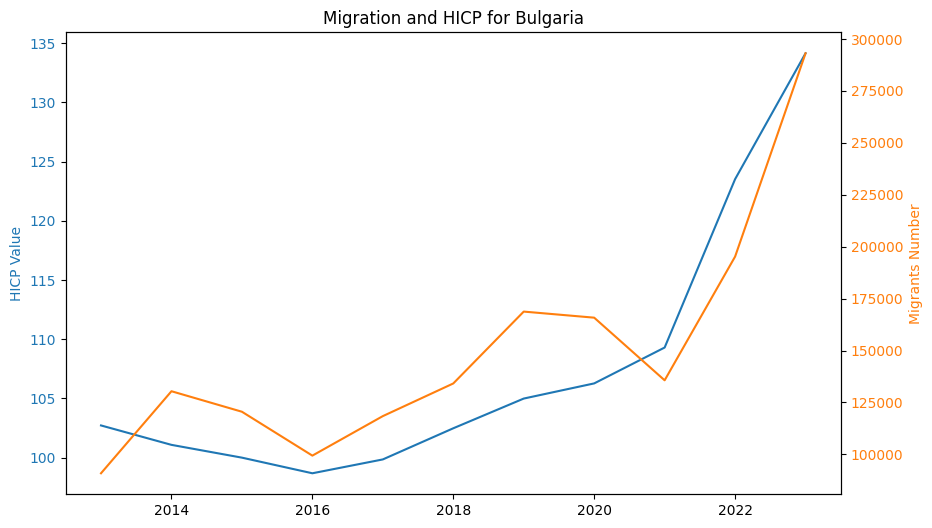

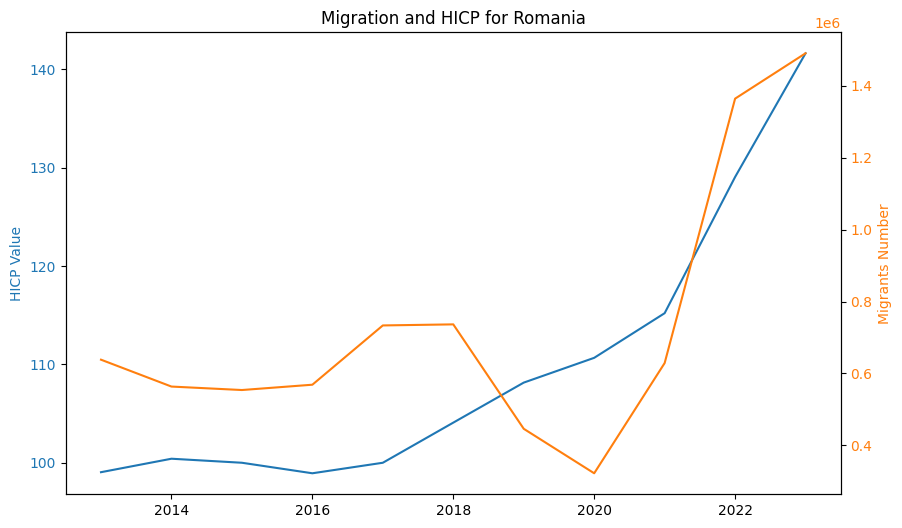

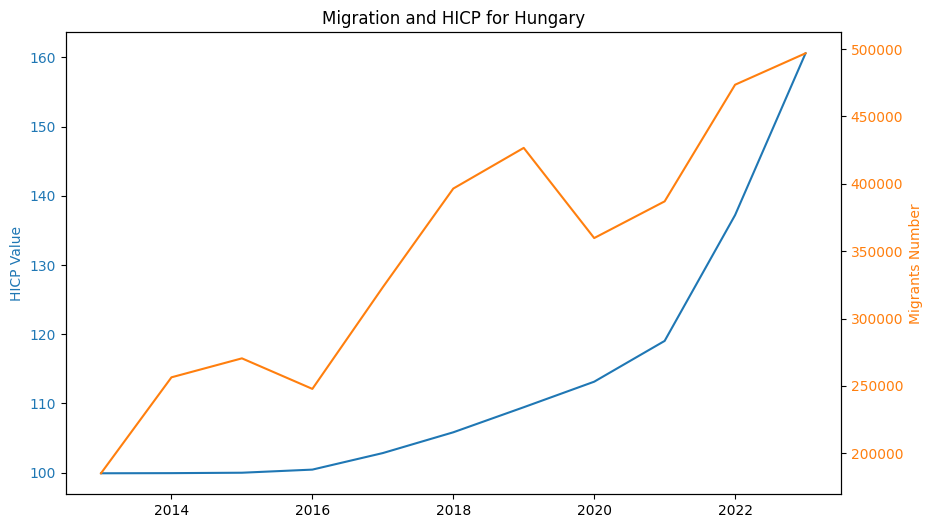

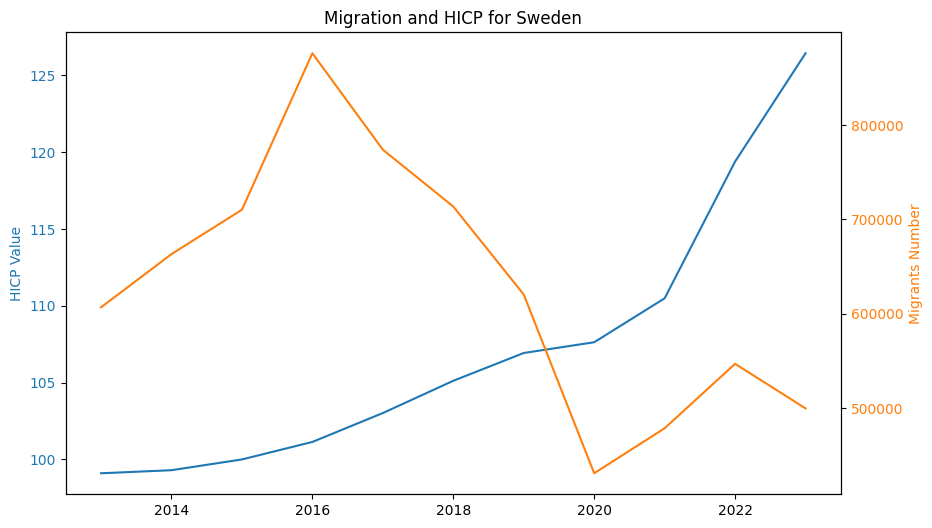

In [16]:
for country in countries:
    hicp_per_country = hicp[hicp['geo'] == country]
    migration_per_country = migration[migration['geo'] == country]

    common_years = set(hicp_per_country['year']).intersection(migration_per_country['year'])
    hicp_per_country = hicp_per_country[hicp_per_country['year'].isin(common_years)]
    migration_per_country = migration_per_country[migration_per_country['year'].isin(common_years)]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(hicp_per_country['year'], hicp_per_country['HICP value'], color='tab:blue', label='HICP Value')
    ax2 = ax1.twinx()
    migration_sum = migration_per_country.groupby('year')['Migrants number'].sum()
    ax2.plot(migration_sum.index, migration_sum.values, color='tab:orange', label='Migrants Number')

    ax1.set_ylabel('HICP Value', color='tab:blue')
    ax2.set_ylabel('Migrants Number', color='tab:orange')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    plt.title(f'Migration and HICP for {country}')
    plt.show()




